In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as ply

In [2]:
data = pd.read_csv(r'C:\Users\HP\Desktop\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


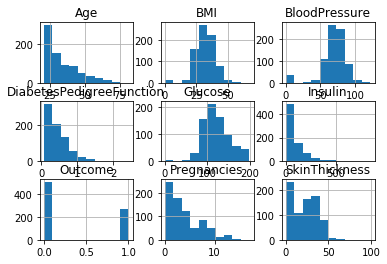

In [33]:
data.hist()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'legend_elements'

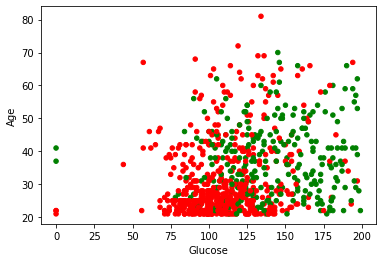

In [48]:
list = {0:'r',1:'g'}
colors =[list[item]for item in data["Outcome"]] 

data.plot(kind = "scatter", x= "Glucose", y= "Age", c= colors)


In [31]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [32]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [694]:
#x= data[["Age","DiabetesPedigreeFunction","Insulin","BloodPressure","Glucose","BMI","SkinThickness"]]
x=data[["Glucose","DiabetesPedigreeFunction","SkinThickness"]]
y=data["Outcome"]

In [695]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1, stratify = y)

In [696]:
y_train.value_counts()
y_test.value_counts()

0    150
1     81
Name: Outcome, dtype: int64

In [697]:
from sklearn.neighbors import KNeighborsClassifier

In [698]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [699]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [700]:
pred = knn.predict(x_test)

In [701]:
pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [702]:
y_pred_prob = knn.predict_proba(x_test)
y_pred_prob[10:12]

array([[0.8, 0.2],
       [0.8, 0.2]])

In [703]:
pred[10:12]

array([0, 0], dtype=int64)

In [704]:
(pred==y_test.values).sum()


172

In [705]:
y_test.size

231

In [706]:
acc = ((pred==y_test.values).sum()/y_test.size)
acc

0.7445887445887446

In [707]:
knn.score(x_test,y_test)

0.7445887445887446

# confusion matrix

In [708]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[129,  21],
       [ 38,  43]], dtype=int64)

In [709]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test,cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# K-FOLD cross validation

In [710]:
from sklearn.model_selection import cross_val_score

## CREATE A NEW KNN model
knn_cv=KNeighborsClassifier(n_neighbors=3)

### Train model with 5-fold cv

In [711]:
cv_scores=cross_val_score(knn_cv,x,y,cv=5)

In [712]:
print(cv_scores)

[0.72077922 0.65584416 0.74025974 0.73202614 0.67973856]


In [713]:
cv_scores.mean()

0.7057295645530941

## Grid search

In [714]:
from sklearn.model_selection import GridSearchCV

### Another  KNN model
knn2 = KNeighborsClassifier()

### CREATING DICTIONARY OF ALL VALUES WE WANT TO TEST FOR N_NEIGHBORS

param_grid={"n_neighbors": np.arange(2,10)}

### USE GRIDSEARCH TO TEST ALL VALUES FOR N_NEIGHBORS

knn_gscv = GridSearchCV(knn2,param_grid,cv=5)

### FIT MODEL TO DATA

knn_gscv.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [715]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [716]:
knn_gscv.best_score_

0.73046875

## Final evolution

In [717]:
knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_["n_neighbors"])
knn_final.fit(x,y)
y_pred= knn_final.predict(x)
knn_final.score(x,y)

0.77734375

# Label prediction with New Data

In [720]:
new_data = np.array([[183,0,23]])
new_data = new_data.reshape(1,-1)

In [721]:
knn_final.predict((new_data))


array([1], dtype=int64)

# Probablity prediction with new data

In [724]:
new_data = np.array([[183,0,23],[145,29,32],[95,22,30]])
knn_final.predict(new_data)

array([1, 1, 0], dtype=int64)

In [725]:
knn_final.predict_proba(new_data)

array([[0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])